<a href="https://colab.research.google.com/github/rmotadutra/welllogseries/blob/main/02_Displaying_LogPlots_using_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# installing the required packages
!pip install lasio

# Welcome

Author: Rodrigo Dutra

In this notebook, our main goal is to learn how to make better visualizations of the data present in well logs. To do this, we will import a LAS file and then use the matplotlib package to generate our visualizations.

**IMPORTANT:** If you don't know how to import a LAS file, please visit the previous notebook: [Importing LAS file](https://github.com/rmotadutra/welllogseries/blob/main/01_Importing_LAS_file.ipynb)

## Requirements

    >> LASIO 0.28
    >> MATPLOTLIB 3.2.2

In [2]:
#importing all the required packages
import lasio
import matplotlib.pyplot as plt

# Importing the data

Let's import the data as we leanerd in the previous notebook.

In [3]:
#download the LAS file to the notebook
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1kILe1p92lidoihfF2hvlMv5wkrsp9oCR' -O AA-13-30-091-08W4-0.las

--2021-04-20 11:39:58--  https://docs.google.com/uc?export=download&id=1kILe1p92lidoihfF2hvlMv5wkrsp9oCR
Resolving docs.google.com (docs.google.com)... 173.194.197.102, 173.194.197.139, 173.194.197.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.197.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-9g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dcolckkn8et9jcc20l0kb5pbttidgijk/1618918725000/08833350476852292073/*/1kILe1p92lidoihfF2hvlMv5wkrsp9oCR?e=download [following]
--2021-04-20 11:39:58--  https://doc-10-9g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dcolckkn8et9jcc20l0kb5pbttidgijk/1618918725000/08833350476852292073/*/1kILe1p92lidoihfF2hvlMv5wkrsp9oCR?e=download
Resolving doc-10-9g-docs.googleusercontent.com (doc-10-9g-docs.googleusercontent.com)... 64.233.191.132, 2607:f8b0:4001:c0c::84
Connecting to doc-10-9g-docs.googleusercontent.com (doc-10-

In [4]:
#importing the data
path = "AA-13-30-091-08W4-0.las"
well = lasio.read(path)
welllogs = well.curves
print(welllogs)

Mnemonic  Unit  Value         Description                     
--------  ----  -----         -----------                     
DEPT      FT    0   1  0  0   1 DEPTH                         
CALI      IN    45 280  1  1  2 DENSITY CALIPER               
DPHI      %     45 890 12  1  3 DENSITY POROSITY (SANDSTONE)  
GR        GAPI  45 310  1  1  4 GAMMA RAY                     
RHOB      G/C3  45 350  1  1  5 BULK DENSITY                  
LLS       OHMM  11 220  9  1  6 FOCUSSED RESISTIVITY          
SP        MV    11  10  1  1  7 SPONTANEOUS POTENTIAL         
NPHI      %     41 890  3  1  8 NEUTRON POROSITY (SANDSTONE)  


Now, we can generate a simple plot just to check that everything is ok. With the function plt.plot() and choosing the x and y data we create the plot. With the function plt.show() we display the plot on the screen.

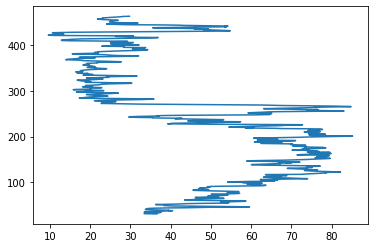

In [5]:
# plotting a simple log
plt.plot(welllogs.GR.data, welllogs.DEPT.data)
plt.show()

With the previous plot, we can add color, title, label, grid, we can invert the y axis. To customize the plot this way we use other functions available in matplotlob package. For futher informations, please visit the matplotlib documentation.

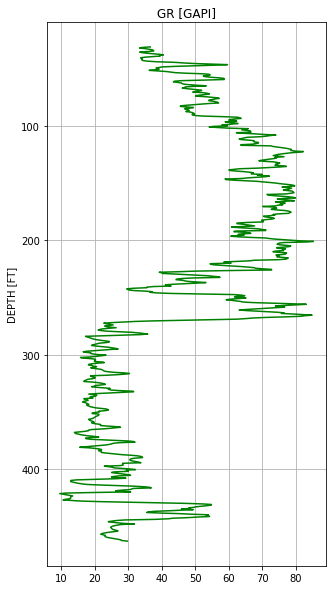

In [ ]:
# customizing the plot
plt.figure(figsize=(5, 10))
plt.plot(welllogs.GR.data, welllogs.DEPT.data, color="green")
plt.gca().invert_yaxis()
plt.title(f"GR [{welllogs.GR.unit}]")
plt.ylabel(f"DEPTH [{welllogs.DEPT.unit}]")
plt.grid()
plt.show()

Now our plot is getting interesting, but what would it be like to plot different curves? 
For this, it is necessary to use the subplots feature. The subplot function accepts three integers as an argument, where the first indicates the number of lines, the second indicates the number of columns and the third the position of the plot.

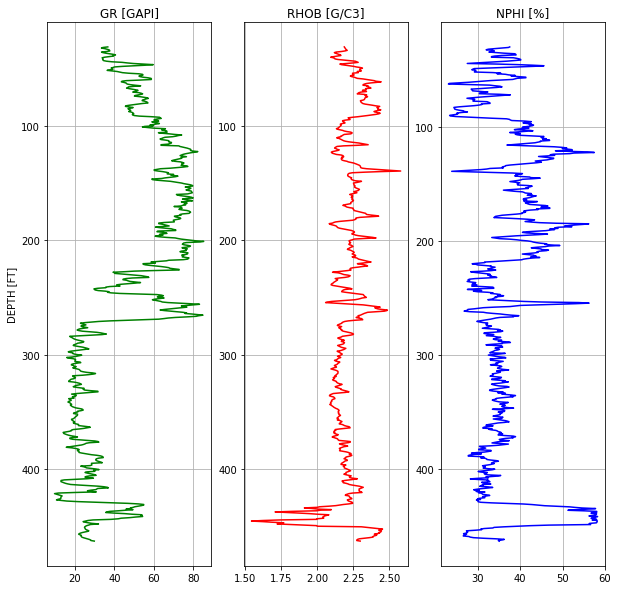

In [ ]:
# plotting multiple tracks
plt.figure(figsize=(10, 10))
ax1 = plt.subplot(131)
ax1.plot(welllogs.GR.data, welllogs.DEPT.data, color="green")
ax1.set_title(f"GR [{welllogs.GR.unit}]")
ax1.invert_yaxis()
ax1.set_ylabel(f"DEPTH [{welllogs.DEPT.unit}]")
ax1.grid()
ax2 = plt.subplot(132)
ax2.plot(welllogs.RHOB.data, welllogs.DEPT.data, color="red")
ax2.set_title(f"RHOB [{welllogs.RHOB.unit}]")
ax2.invert_yaxis()
ax2.grid()
ax2 = plt.subplot(133)
ax2.plot(welllogs.NPHI.data, welllogs.DEPT.data, color="blue")
ax2.set_title(f"NPHI [{welllogs.NPHI.unit}]")
ax2.invert_yaxis()
ax2.grid()
plt.show()

In the future, we will see a notebook with more features to create more advanced logplots. In the next notebook, we will show you how to create other types of plots.